# Buliding classification model

sklearn decision tree

## Data prepreocessing

In [1]:
import pandas as pd
import numpy as np
import random
random.seed(0)
np.random.seed(0)

In [2]:
def open_data(fname: str ='training.txt')->pd.DataFrame:
    """
    Open training data and convert data to DataFrame.
    """
    data_list = []
    with open(fname,'r',encoding='utf-8') as fh:
        for i in fh:
            i = i.strip() # remove redunat while space
            i = i[1:-1] # remove "{", "}"
            i = i.split(',') 
            attr_list = [-1. for x in range(5)]
            attr_list[2] = 0 # basic
            for attr in i:
                attr = attr.split()
                attr_type = attr[0]
                attr_value = attr[1]
                if attr_value.isnumeric():
                    attr_value = float(attr_value)
                if attr_type == '0': # marital_status
                    if attr_value == 'S':
                        attr_list[0] = 0.
                    elif attr_value == 'M':
                        attr_list[0] = 1.
                        
                elif attr_type == '1': # num_children
                    attr_list[1] = attr_value
                    
                elif attr_type == '2': # member_card
                    if attr_value == 'Normal':
                        attr_list[2] = 1.
                    elif attr_value == 'Silver':
                        attr_list[2] = 2.
                    elif attr_value == 'Gold': 
                        attr_list[2] = 3.
                        
                elif attr_type == '3': # age
                    #attr_list[3] = attr_value
                    if attr_value < 25:
                        attr_list[3]  = 0.
                    if 25 <= attr_value < 50:
                        attr_list[3]  = 1.
                    if 50 <= attr_value < 75:
                        attr_list[3]  = 2.
                    if 75 <= attr_value:
                         attr_list[3]  = 3.                    
                    
                elif attr_type == '4': # year_income
                    
                    #attr_list[4] = attr_value
                    if attr_value < 25000:
                        attr_list[4] = 0.
                    if 25000 <= attr_value <50000:
                        attr_list[4] = 1.
                    if 50000 <= attr_value < 75000:
                        attr_list[4] = 2.
                    if 75000 <= attr_value:
                        attr_list[4] = 3.
                    
            data_list.append(attr_list)
    df = pd.DataFrame(data_list, columns =['marital_status', 'num_children','member_card', 'age','year_income'])
    return df

In [3]:
traindf = open_data()
traindf

,marital_status,num_children,member_card,age,year_income
0,-1.0,1.0,0.0,1.0,3.0
1,1.0,-1.0,3.0,3.0,3.0
2,1.0,1.0,3.0,3.0,0.0
3,-1.0,-1.0,1.0,1.0,0.0
4,1.0,-1.0,0.0,1.0,1.0
...,...,...,...,...,...
486,1.0,-1.0,1.0,3.0,0.0
487,-1.0,5.0,1.0,1.0,0.0
488,1.0,3.0,3.0,2.0,1.0
489,1.0,3.0,2.0,1.0,1.0


In [4]:
cvdf = open_data('test.txt')
cvdf

,marital_status,num_children,member_card,age,year_income
0,1.0,1.0,0.0,2.0,2.0
1,-1.0,3.0,2.0,1.0,3.0
2,1.0,2.0,0.0,2.0,3.0
3,1.0,2.0,1.0,1.0,2.0
4,-1.0,-1.0,0.0,2.0,2.0
...,...,...,...,...,...
206,1.0,-1.0,0.0,3.0,1.0
207,1.0,1.0,0.0,1.0,1.0
208,-1.0,1.0,0.0,3.0,1.0
209,1.0,1.0,0.0,1.0,3.0


In [5]:
from sklearn.utils import shuffle
traindf = shuffle(traindf)
traindf

,marital_status,num_children,member_card,age,year_income
238,-1.0,2.0,0.0,1.0,3.0
179,1.0,3.0,0.0,2.0,3.0
438,-1.0,2.0,0.0,1.0,3.0
325,-1.0,-1.0,0.0,3.0,3.0
15,-1.0,1.0,0.0,3.0,2.0
...,...,...,...,...,...
323,1.0,2.0,0.0,1.0,1.0
192,-1.0,-1.0,0.0,2.0,2.0
117,1.0,-1.0,0.0,3.0,1.0
47,1.0,-1.0,2.0,2.0,2.0


In [6]:
def count_missing_val(Train=True):
    """
    Count missing value in data.
    """
    if Train:
        df = traindf
        print('[Training data]')
    else:
        df = cvdf
        print('[Validation data]')
    count = 0
    for idx in range(len(df)):
        a,b,c,d,e = df.iloc[idx]

        if (a==-1.) or (b==-1.) or (c==-1.) or (d==-1.) or (e==-1.):
            count += 1
    
    print('Total row:',len(df))
    print('Missing row:',count)
    print()

In [7]:
count_missing_val()
count_missing_val(False)

[Training data]
Total row: 491
Missing row: 320

[Validation data]
Total row: 211
Missing row: 136



### Spliting   feature X and label y

In [8]:
train_X = traindf[['marital_status','num_children','age','year_income']].values
print('train_X:',train_X.shape)

train_y = traindf['member_card'].values
print('train_y:',train_y.shape)

train_X: (491, 4)
train_y: (491,)


In [9]:
cv_X = cvdf[['marital_status','num_children','age','year_income']].values
print('cv_X:',cv_X.shape)

cv_y = cvdf['member_card'].values
print('cv_y:',cv_y.shape)

cv_X: (211, 4)
cv_y: (211,)


### Feature normalization

In [12]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler((-1,1))

In [13]:
# X_scaled = scaler.fit_transform(train_X)
# X_test_scaled = scaler.fit_transform(cv_X)

## check label balance

In [14]:
def check_balance(Train=True):
    if Train:
        df = traindf
        print('[Training]')
    else:
        df = cvdf
        print('[Validation]')
        
    len0 = len(df[df['member_card']==0])
    len1 = len(df[df['member_card']==1])
    len2 = len(df[df['member_card']==2])
    len3 = len(df[df['member_card']==3])
    
    max_ = max([len0, len1, len2, len3])
    
    weights = [max_/len0, max_/len1, max_/len2, max_/len3]

    print('Num of label basic:',len0)
    print('Num of label normal:',len1)
    print('Num of label silver:',len2)
    print('Num of label gold:',len3)
    print('-'*20)
    print('weights:',weights)
    print('Total:',len0+len1+len2+len3)
    print('Len of df:',len(df))
    print()
    
    return weights

In [15]:
weights = check_balance()
_ = check_balance(False)

[Training]
Num of label basic: 254
Num of label normal: 79
Num of label silver: 65
Num of label gold: 93
--------------------
weights: [1.0, 3.2151898734177213, 3.9076923076923076, 2.7311827956989245]
Total: 491
Len of df: 491

[Validation]
Num of label basic: 126
Num of label normal: 26
Num of label silver: 33
Num of label gold: 26
--------------------
weights: [1.0, 4.846153846153846, 3.8181818181818183, 4.846153846153846]
Total: 211
Len of df: 211



## SK-learn

In [50]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [51]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X, train_y)

In [57]:
training_acc = clf.score(train_X,train_y)
print('Train acc:',training_acc)
# pred_y = clf.predict(train_X)
# accuracy_score(train_y, pred_y)

Train acc: 0.7230142566191446


In [58]:
cv_acc = clf.score(cv_X, cv_y)
print('Validation acc:',cv_acc)
# pred_cv_y = clf.predict(cv_X)
# accuracy_score(cv_y, pred_cv_y)

Validation acc: 0.7014218009478673


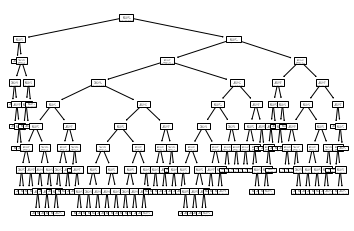

In [54]:
infos=tree.plot_tree(clf)